### Multiclass classification example using the Iris dataset

The irirs dataset has 3 classes with 50 samples in each, so a total of 150 samples.

Each sample has 4 features(different characteristics of the Iris plant): the sepal length, sepal width, the petal length and the petal width.

The three classes are : Iris-Setosa (0), Iris-Versicolour (1), Iris-Virginica (2)

In [39]:
from sklearn.datasets import load_iris

In [40]:
# see a quick description of the dataset
print(load_iris().DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [41]:
X, y = load_iris(return_X_y=True, as_frame=True)

In [42]:
# the feature matrix
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [43]:
# our label can be either 0, 1, or 2 representing the three different classes
y


0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64

In [44]:
X.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [45]:
# Performing the train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [46]:
X_train.shape, X_test.shape

((120, 4), (30, 4))

#### Fitting the logistic regression model

In [47]:
from sklearn.linear_model import LogisticRegression

In [48]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [49]:
model.score(X_test, y_test)

1.0

In [50]:
model.score(X_train, y_train)

0.9666666666666667

In [61]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

Text(8.222222222222223, 0.5, 'Truth')

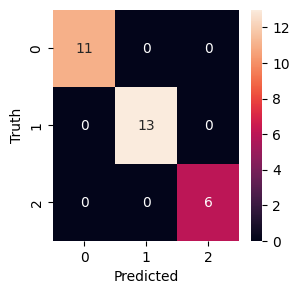

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(3, 3))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')


So we get an accuracy of 1 on the test set and 0.96 on the train set. No mistakes were made on the test set.

Let's try performing feature scaling and see how it affects our predictions

In [87]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# make a pipeline which first applies the standard scaler
# and then fits the logistic regression model
model = Pipeline([('scaler', StandardScaler()),
                  ('log_reg', LogisticRegression())])

In [88]:
# fit the model on the training data
model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('log_reg', LogisticRegression())])

In [89]:
# check the score on the test data
model.score(X_test, y_test)

1.0

In [91]:
# check score on the training data
model.score(X_train, y_train)

0.9583333333333334

No major differences in predictions!